<a href="https://colab.research.google.com/github/satya0212/Machine-Learning-Projects/blob/main/Calorie_Expenditure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# take a look to our data
data=pd.read_csv('/content/train (2).csv')



In [4]:
data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [5]:
data.shape

(750000, 9)

In [6]:
data['Sex'].value_counts()

,count
Sex,
female,375721
male,374279


In [7]:
data.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [8]:
data=data.drop(columns=['id'],axis=1)

In [9]:
data

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...
749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [10]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
data=data.replace({'Sex':{'male':0,'female':1}})

/tmp/ipython-input-2323208656.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({'Sex':{'male':0,'female':1}})


In [12]:
data

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,1,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...
749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0


In [13]:
data['bmi']=data['Weight']/(data['Height']/100)**2

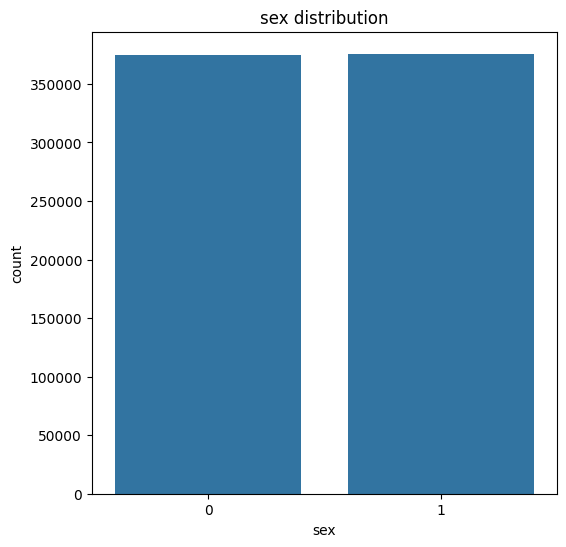

In [14]:
#data visualisation
plt.figure(figsize=(6,6))
sns.countplot(x='Sex',data=data)
plt.title('sex distribution')
plt.xlabel('sex')
plt.ylabel('count')
plt.show()

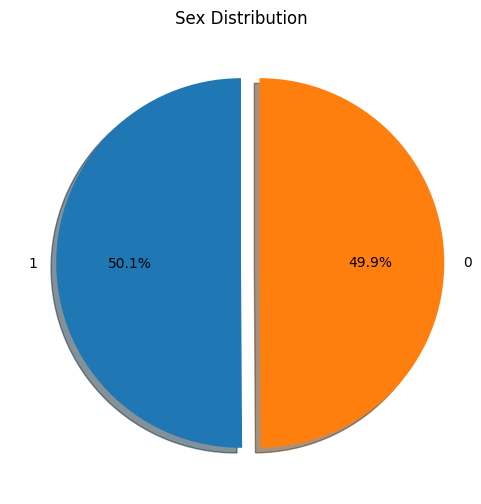

In [15]:
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90,shadow=True,explode=(0,0.1))
plt.title('Sex Distribution')
plt.show()

/tmp/ipython-input-3783895136.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


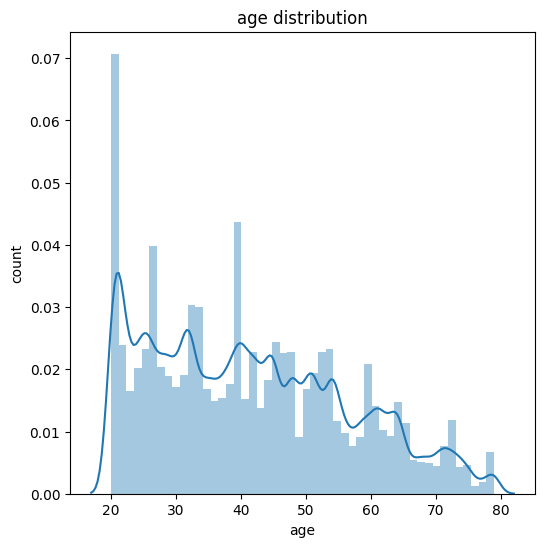

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(data['Age'])
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

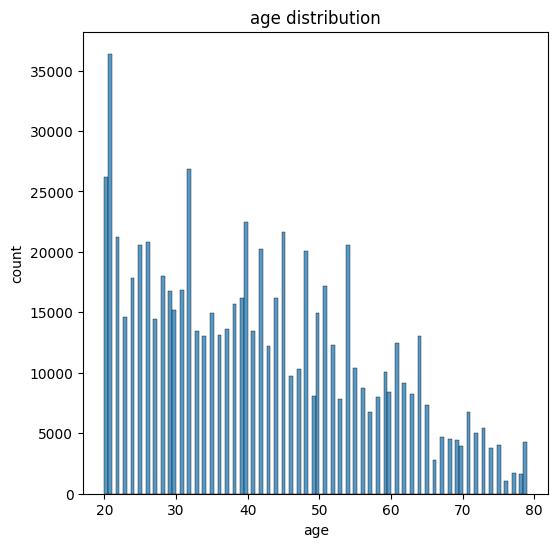

In [17]:
plt.figure(figsize=(6,6))
sns.histplot(data['Age'])
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

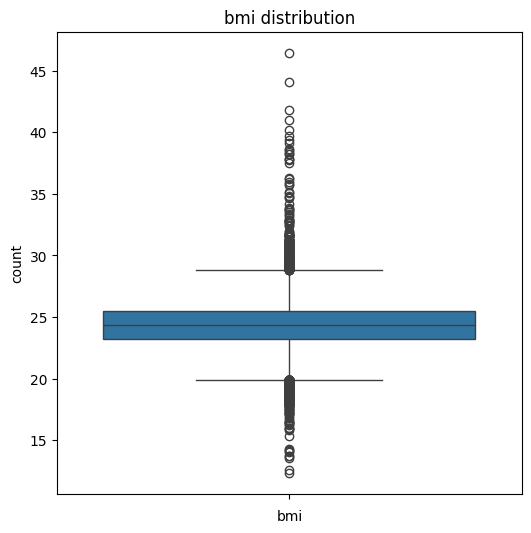

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(data['bmi'])
plt.title('bmi distribution')
plt.xlabel('bmi')
plt.ylabel('count')
plt.show()

/tmp/ipython-input-3662283656.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


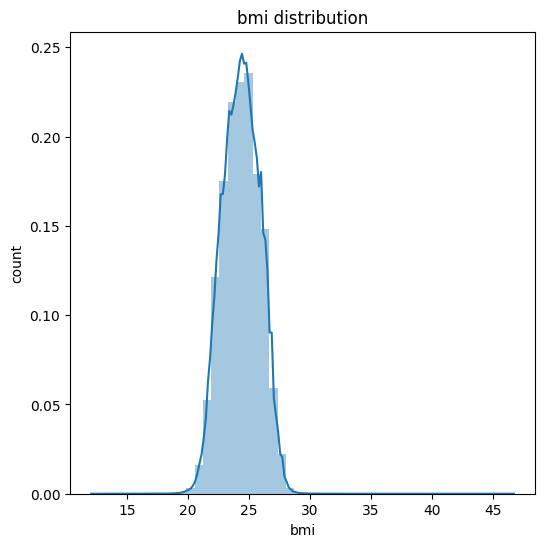

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('bmi distribution')
plt.xlabel('bmi')
plt.ylabel('count')
plt.show()

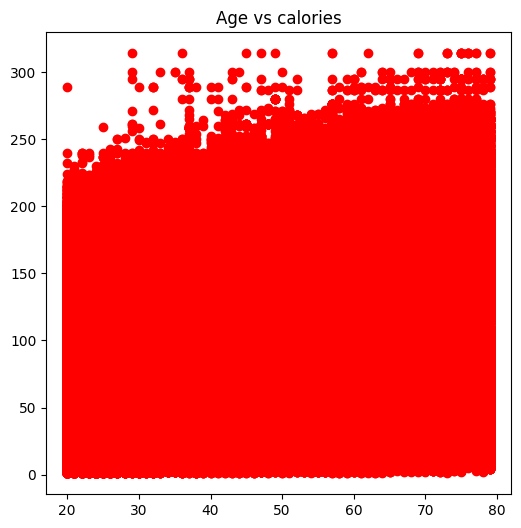

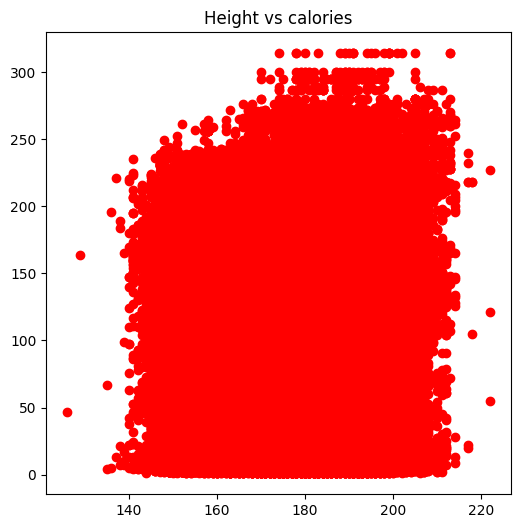

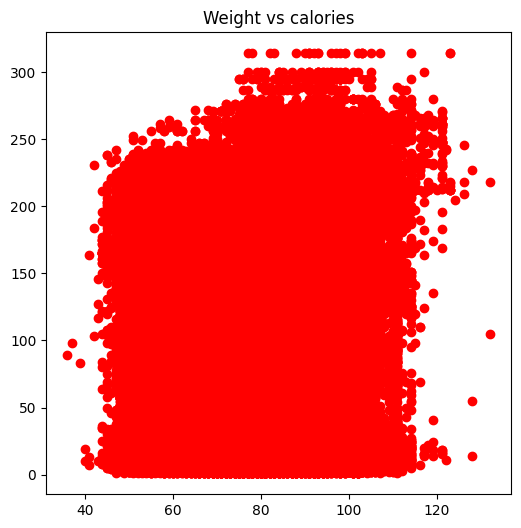

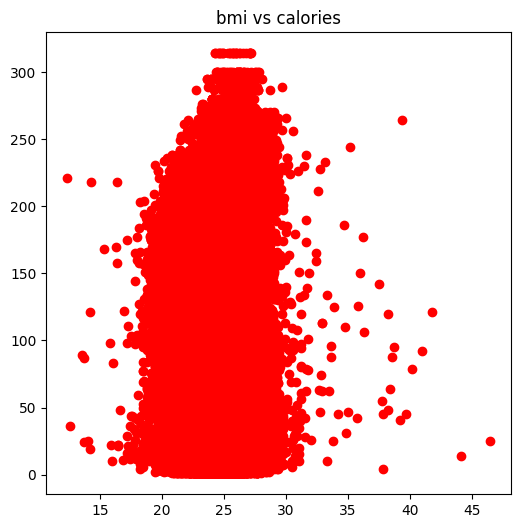

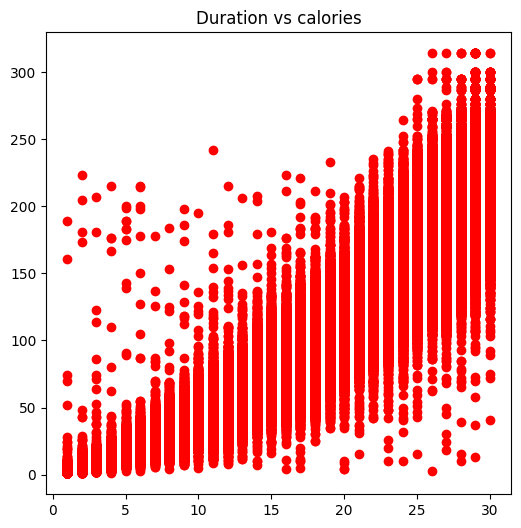

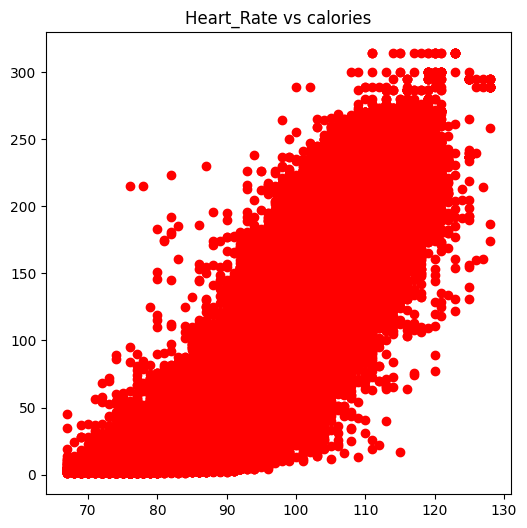

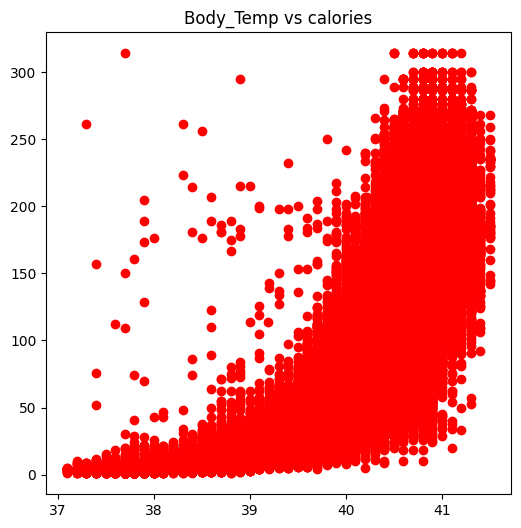

In [20]:
for col in ['Age','Height','Weight','bmi','Duration','Heart_Rate','Body_Temp']:
  plt.figure(figsize=(6,6))
  plt.scatter(data[col],data['Calories'],color='red')
  plt.title(f'{col} vs calories')
  plt.show()


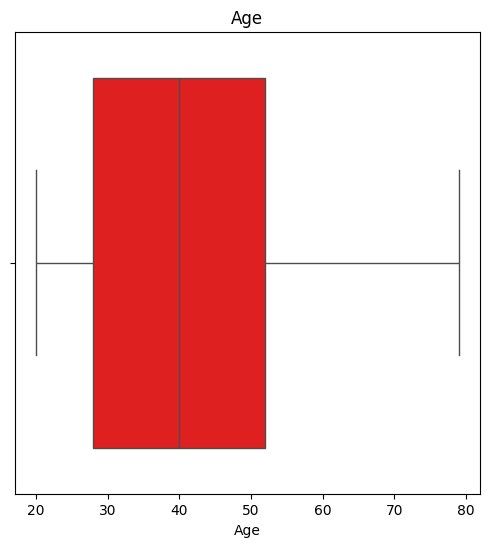

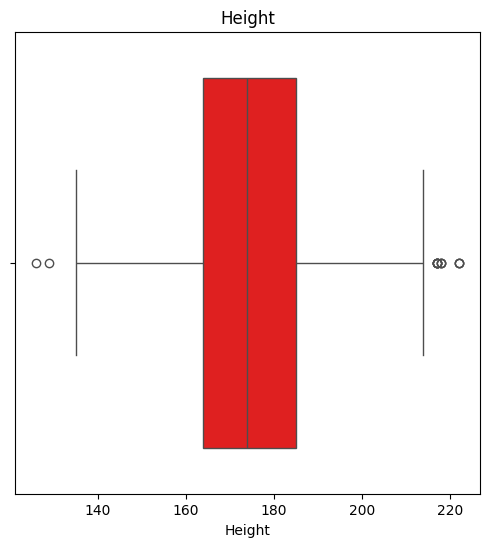

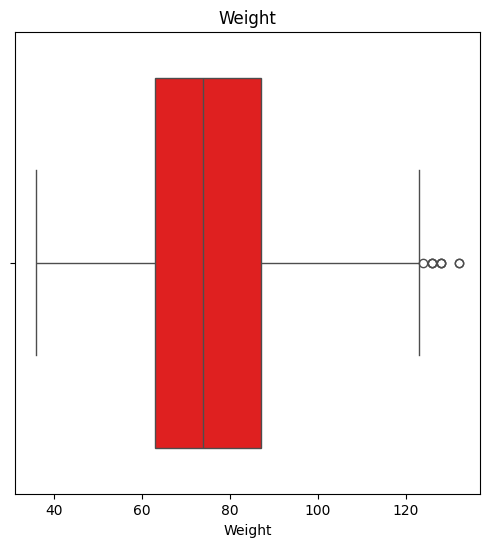

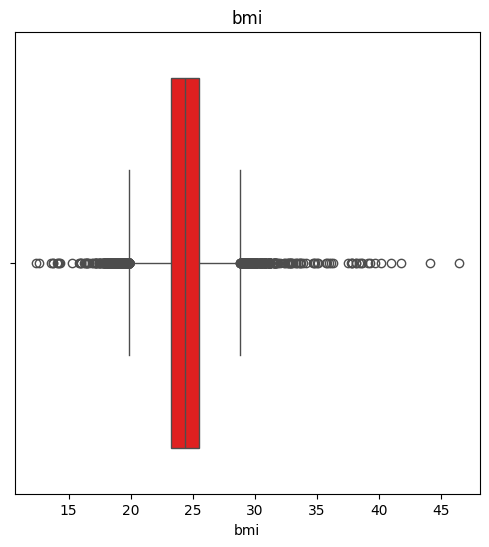

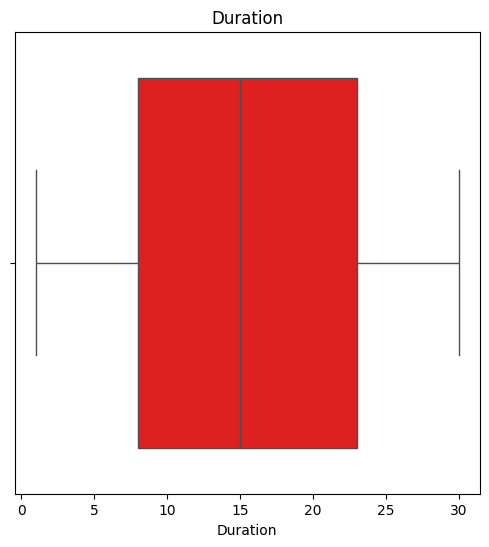

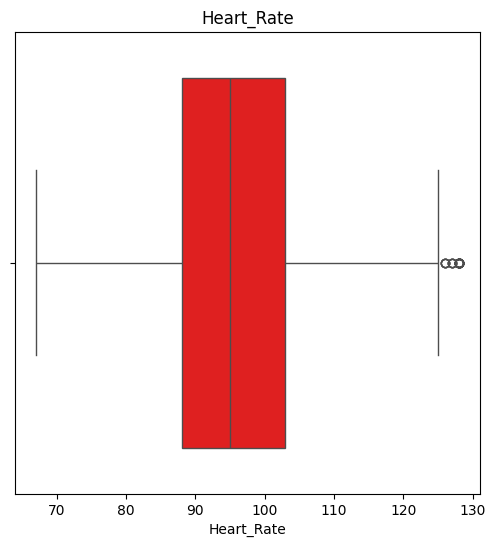

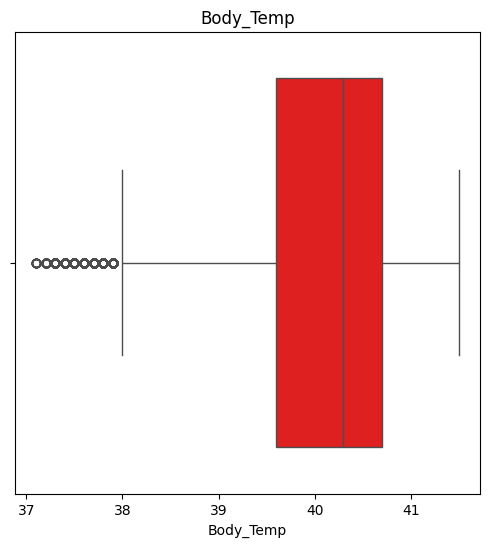

In [21]:
for col in ['Age','Height','Weight','bmi','Duration','Heart_Rate','Body_Temp']:
  plt.figure(figsize=(6,6))
  sns.boxplot(x=col,data=data,color='red')
  plt.title(f'{col}')
  plt.show()

<Figure size 600x600 with 0 Axes>

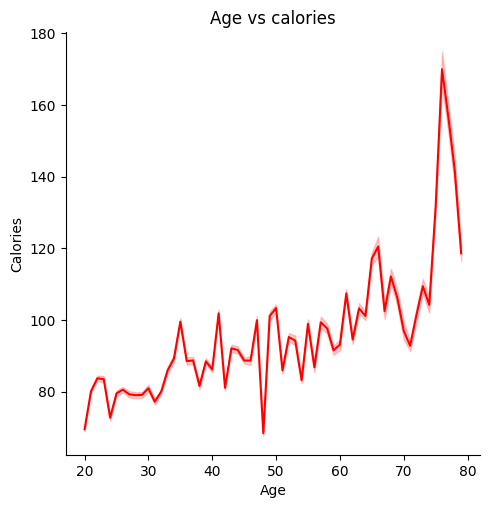

<Figure size 600x600 with 0 Axes>

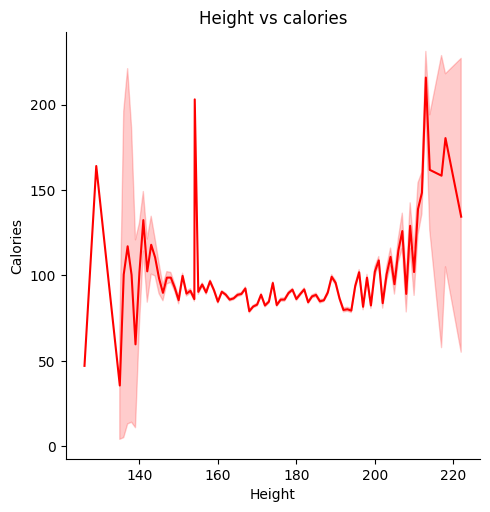

<Figure size 600x600 with 0 Axes>

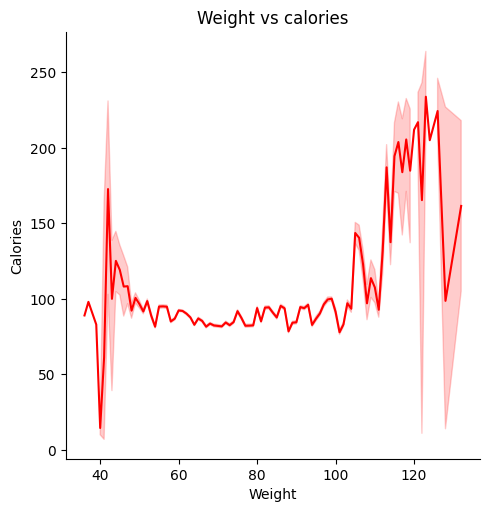

<Figure size 600x600 with 0 Axes>

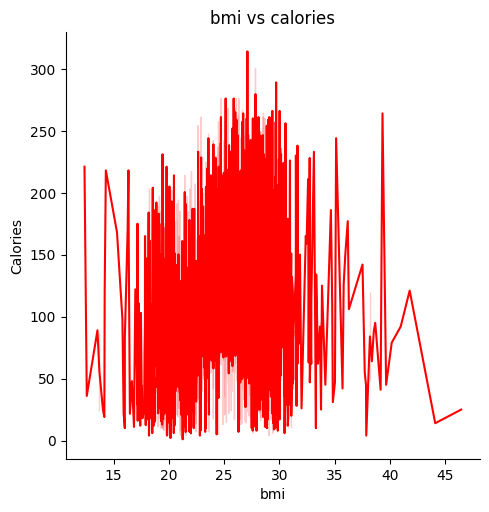

<Figure size 600x600 with 0 Axes>

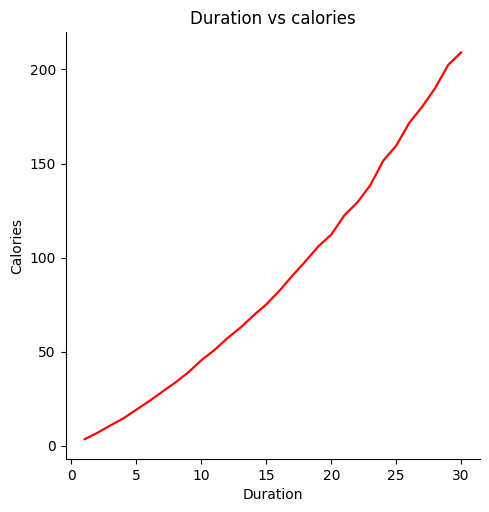

<Figure size 600x600 with 0 Axes>

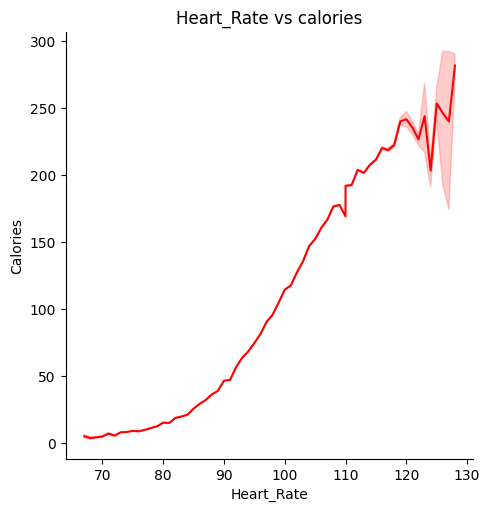

<Figure size 600x600 with 0 Axes>

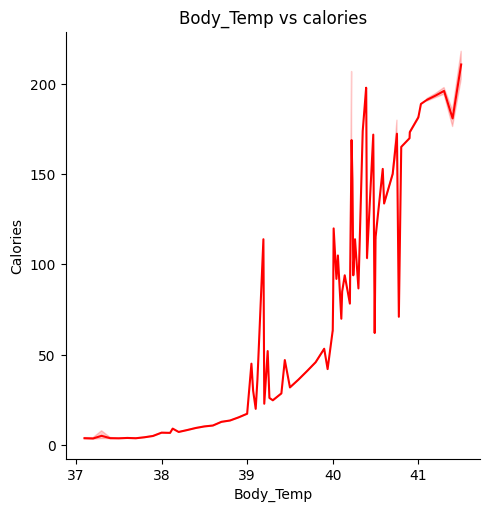

In [22]:
for col in ['Age','Height','Weight','bmi','Duration','Heart_Rate','Body_Temp']:
    plt.figure(figsize=(6,6))
    sns.relplot(x=col,y='Calories',data=data,kind='line',color='red')
    plt.title(f'{col} vs calories')
    plt.show()

In [23]:
correlation=data.corr()

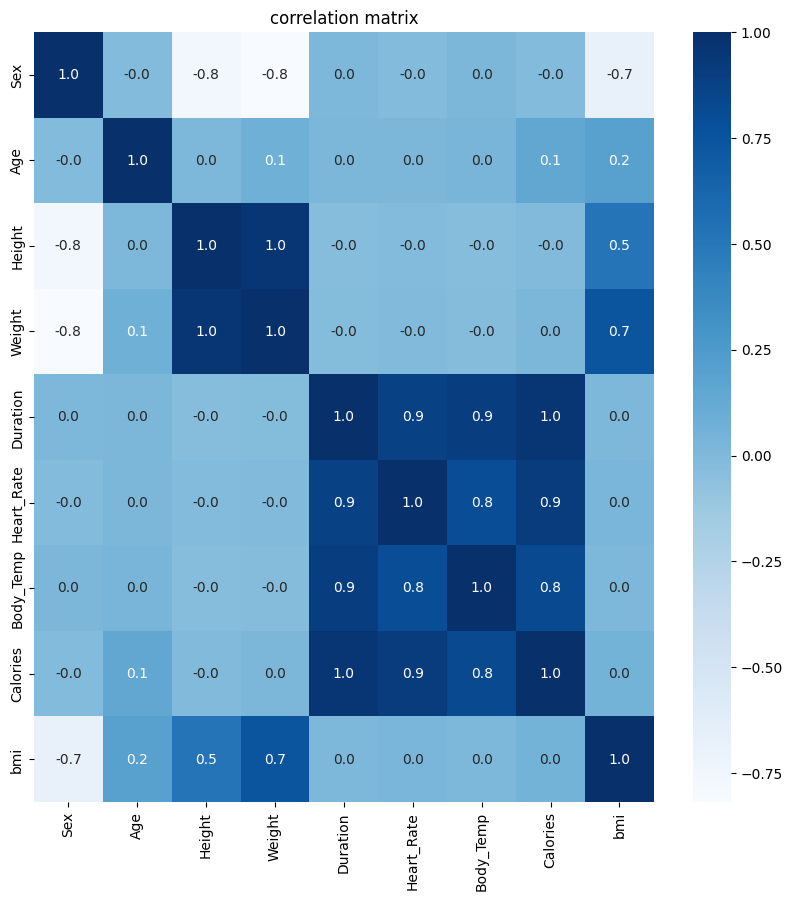

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,fmt='.1f',cbar=True,cmap='Blues')
plt.title('correlation matrix')
plt.show()


# Predictive Model

In [25]:
x=data.drop(columns='Calories',axis=1)
y=data['Calories']

In [26]:
x.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,bmi
0,0,36,189.0,82.0,26.0,101.0,41.0,22.955684
1,1,64,163.0,60.0,8.0,85.0,39.7,22.582709
2,1,51,161.0,64.0,7.0,84.0,39.8,24.690405
3,0,20,192.0,90.0,25.0,105.0,40.7,24.414062
4,1,38,166.0,61.0,25.0,102.0,40.6,22.136740


In [27]:
y.head()

,Calories
0,150.0
1,34.0
2,29.0
3,140.0
4,146.0


In [28]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
models={
    'linearregression':LinearRegression(),
    'xgboost':XGBRegressor(),
    'knn':KNeighborsRegressor(),
    #'randomforest':RandomForestRegressor(),
    'gradientboosting':GradientBoostingRegressor(),
    'adaboost':AdaBoostRegressor(),
    #'svm':SVR()
}

In [31]:
for model_name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('mse:',mean_squared_error(y_test,y_pred))
  print('r2:',r2_score(y_test,y_pred))

mse: 120.23518612886684
r2: 0.9691887630176295
mse: 14.74656740014097
r2: 0.9962210730696148
mse: 25.066861866666667
r2: 0.9935764143072858
mse: 21.9157325385383
r2: 0.9943839166334935
mse: 220.84911119493086
r2: 0.9434056325651645


# Xgboost is giving the best result among all as it has minimum mse and highest r2 score

In [32]:
xgboost=XGBRegressor()
xgboost.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model evaluation

In [36]:
input_data=(0,41,182.0,89.0,15.0,93.0,40.1,26.86)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=xgboost.predict(input_data_reshaped)
print('calories burnt:',prediction)

calories burnt: [72.96981]
